______________________________________________________________________________
|                             Massa Total Lamina                             |
______________________________________________________________________________
|      Hasil integral       |Error bound dengan asumsi batas atas mendekati 1|
|||          64.0           | 1.0000000000000006e-10
______________________________________________________________________________


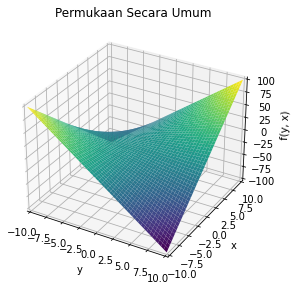

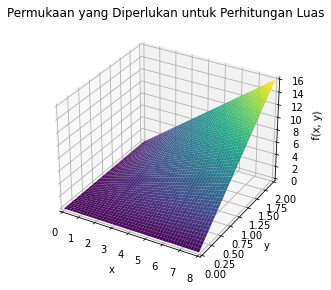

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot3d

# Fungsi yang dicari
def function(x, y):
    return x*y

# Limit integral

# Limit luar, limit y
y_0 = 0 # Limit bawah
y_n = 2 # Limit atas

# Limit dalam, limit x
x_0 = 0 # Limit bawah
x_n = 8 # Limit atas

# Titik mesh grid points. Tingkatkan nilai ini untuk akurasi yang lebih tinggi
ny = 40 # Titik mesh grid pada sumbu x
nx = 40 # Titik mesh grid pada sumbu y

# Ukuran langkah
hx = (x_n - x_0)/nx # Ukuran langkah untuk nilai x
hy = (y_n - y_0)/ny # Ukuran langkah untuk nilai y

# Implementasi Metode Simpson 1/3

# Jumlah awal
sum = 0

for i in range(0,ny+1): # Loop luar sebagai dy adalah parameter integrasi luar
    if i==0 or i==ny: # Koefisien = 1 untuk titik awal dan akhir
        w_y = 1
    elif i%2!=0: # Koefisien = 4 untuk jumlah di atas indeks ganjil
        w_y = 4
    else:
        w_y = 2 # Koefisien = 2 untuk jumlah di atas indeks genap
    for j in range(0, nx+1):
        if j==0 or j==nx:
            w_x = 1 
        elif j%2!=0:
            w_x = 4
        else:
            w_x = 2
        x = x_0 + j*hx # Mengubah x dengan kenaikan hx
        y = y_0 + i*hy # Mengubah y dengan kenaikan hy
        sum = sum + w_y * w_x * function(x, y) # Mengulangi jumlah di atas indeks i dan j
Simp_int = hx*hy/9 *sum # Akhir Metode Simpson 1/3
error_bound = 1/90*90 *hx**5 * hy**5 # Error bound Metode Simpson 1/3

# Tabel hasil
print("______________________________________________________________________________")
print("|{:^76}|". format("Massa Total Lamina"))
print("______________________________________________________________________________")
print("|{:^27}|{:^16}|". format("Hasil integral","Error bound dengan asumsi batas atas mendekati 1"))
print("|{:^1}|{:^25}|". format("|", Simp_int), format(error_bound))
print("______________________________________________________________________________")

# Memplotting grafik
x, y = sp.symbols('x y')
plot3d(function(x, y), title ='Permukaan Secara Umum')
plot3d(function(x, y), (x, x_0, x_n), (y, y_0, y_n), title='Permukaan yang Diperlukan untuk Perhitungan Luas')